In [96]:
import sys
from collections import defaultdict

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sqlite3 as sql

In [97]:
conn = sql.connect("dataset/database.sqlite")

In [98]:
df = pd.read_sql_query("select * from business", conn)
df.head()

,id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open
0,--6MefnULPED_I942VcFNA,John's Chinese BBQ Restaurant,,"328 Highway 7 E, Chalmers Gate 11, Unit 10",Richmond Hill,ON,L4B 3P7,43.8409,-79.3996,3.0,30,1
1,--7zmmkVg-IMGaXbuVd0SQ,Primal Brewery,,16432 Old Statesville Rd,Huntersville,NC,28078,35.4371,-80.8437,4.0,42,1
2,--8LPVSo5i0Oo61X01sV9A,Valley Bone and Joint Specialists,,"3941 E Baseline Rd, Ste 102",Gilbert,AZ,85234,33.3795,-111.7280,4.5,3,1
3,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,The Strip,3355 Las Vegas Blvd S,Las Vegas,NV,89109,36.1232,-115.1690,4.0,1389,1
4,--9QQLMTbFzLJ_oT-ON3Xw,Great Clips,,"1835 E Guadalupe Rd, Ste 106",Tempe,AZ,85283,33.3617,-111.9100,3.0,9,1


### Business Ratings: Single Variable Analysis

In [99]:
df.stars.describe()

count    156639.000000
mean          3.647154
std           0.977640
min           1.000000
25%           3.000000
50%           3.500000
75%           4.500000
max           5.000000
Name: stars, dtype: float64

Notice that the mean (3.65) and median (3.5) is above the average of the max and min (3.0)

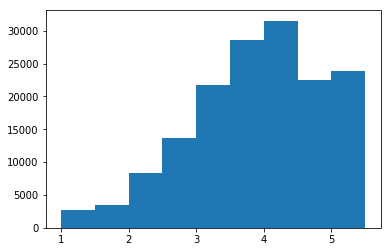

In [100]:
plt.hist(df.stars, bins=[1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5])
plt.show()

### Business Total Number of Reviews: Single Variable Analysis

In [101]:
df.review_count.describe()

count    156639.000000
mean         30.238159
std          96.486631
min           3.000000
25%           4.000000
50%           9.000000
75%          23.000000
max        6979.000000
Name: review_count, dtype: float64

Most business have under 25 reviews

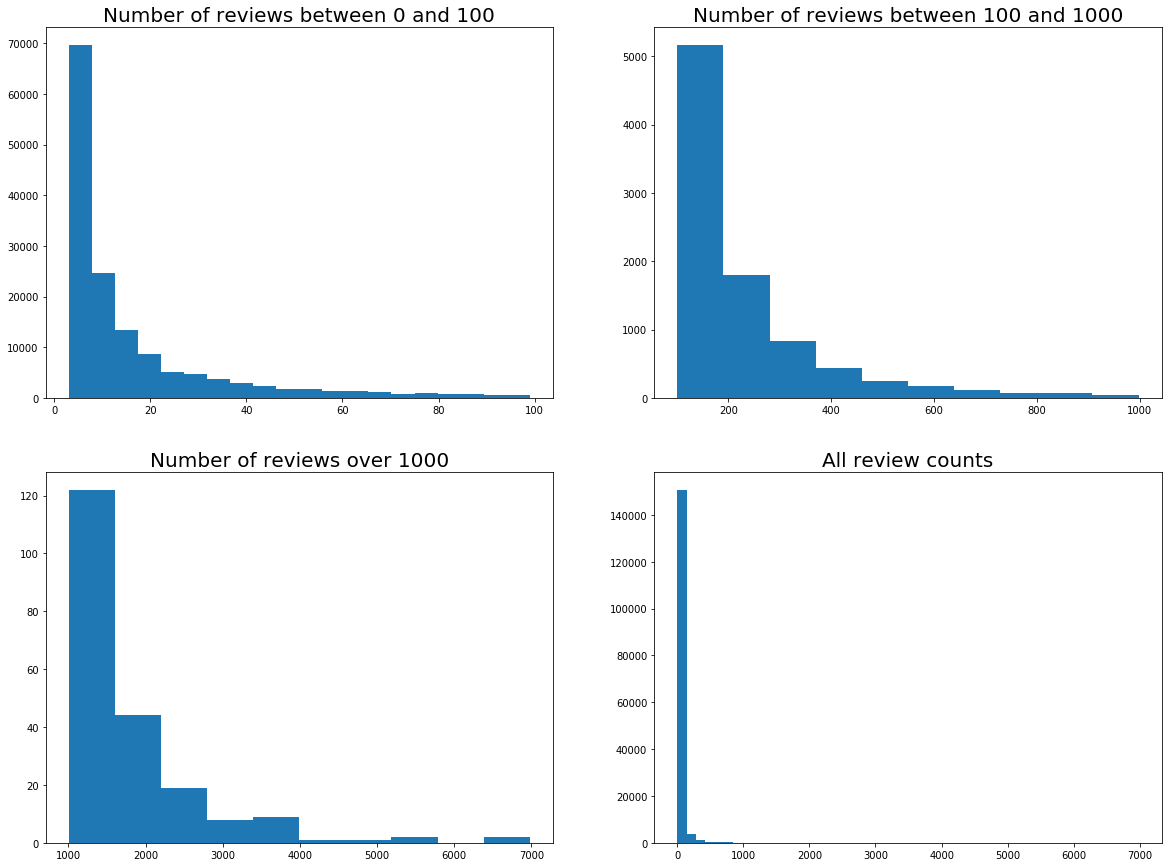

In [102]:
plt.figure(figsize=(20,15))

num_reviews = df.review_count

plt.subplot(221)
plt.hist(list(filter(lambda x: x < 100, num_reviews)), bins=20)
plt.title("Number of reviews between 0 and 100", fontsize=20)
plt.subplot(222)
plt.hist(list(filter(lambda x: x > 100 and x < 1000, num_reviews)))
plt.title("Number of reviews between 100 and 1000", fontsize=20)
plt.subplot(223)
plt.hist(list(filter(lambda x: x > 1000, num_reviews)))
plt.title("Number of reviews over 1000", fontsize=20)
plt.subplot(224)
plt.hist(num_reviews, bins = 50)
plt.title("All review counts", fontsize=20)
plt.show()

### Creating _Number of Tips per Business_ Variable

In [103]:
df_tips = pd.read_sql_query("select * from tip", conn)
df_tips.head()

,user_id,business_id,text,date,likes
0,zcTZk7OG8ovAmh_fenH21g,tJRDll5yqpZwehenzE2cSg,Get here early enough to have dinner.,2012-07-15 00:00:00,0
1,ZcLKXikTHYOnYt5VYRO5sg,jH19V2I9fIslnNhDzPmdkA,Great breakfast large portions and friendly wa...,2015-08-12 00:00:00,0
2,oaYhjqBbh18ZhU0bpyzSuw,dAa0hB2yrnHzVmsCkN4YvQ,Nice place. Great staff. A fixture in the tow...,2014-06-20 00:00:00,0
3,ulQ8Nyj7jCUR8M83SUMoRQ,dAa0hB2yrnHzVmsCkN4YvQ,Happy hour 5-7 Monday - Friday,2016-10-12 00:00:00,0
4,ulQ8Nyj7jCUR8M83SUMoRQ,ESzO3Av0b1_TzKOiqzbQYQ,"Parking is a premium, keep circling, you will ...",2017-01-28 00:00:00,0


In [104]:
tips_by_business_col = list(df_tips.business_id)
del df_tips

In [105]:
tip_counts = defaultdict(int)
for bus in tips_by_business_col:
    tip_counts[bus] += 1

#### Print out number of businesses that don't have a tip

In [106]:
businesses = set(df.id)
tip_bus = set(tip_counts.keys())
print(len(businesses))

156639


In [107]:
total_not_included = 0
for bus in businesses:
    if not (bus in tip_bus):
        total_not_included += 1
print("Number of business absent from 'business':", total_not_included)

Number of business absent from 'business': 52227


In [108]:
l = [(k, v) for (k, v) in tip_counts.items()]

df_total = pd.DataFrame(l)
df_total.columns = ["id", "tip_count"]
df_total.head()

,id,tip_count
0,tJRDll5yqpZwehenzE2cSg,1
1,jH19V2I9fIslnNhDzPmdkA,1
2,dAa0hB2yrnHzVmsCkN4YvQ,3
3,ESzO3Av0b1_TzKOiqzbQYQ,71
4,k7WRPbDd7rztjHcGGkEjlw,11


In [109]:
df.shape

(156639, 12)

In [110]:
merged = pd.merge(left=df,right=df_total, how='left', 
                       left_on='id', right_on='id')
merged.head()

,id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,tip_count
0,--6MefnULPED_I942VcFNA,John's Chinese BBQ Restaurant,,"328 Highway 7 E, Chalmers Gate 11, Unit 10",Richmond Hill,ON,L4B 3P7,43.8409,-79.3996,3.0,30,1,12.0
1,--7zmmkVg-IMGaXbuVd0SQ,Primal Brewery,,16432 Old Statesville Rd,Huntersville,NC,28078,35.4371,-80.8437,4.0,42,1,10.0
2,--8LPVSo5i0Oo61X01sV9A,Valley Bone and Joint Specialists,,"3941 E Baseline Rd, Ste 102",Gilbert,AZ,85234,33.3795,-111.7280,4.5,3,1,NaN
3,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,The Strip,3355 Las Vegas Blvd S,Las Vegas,NV,89109,36.1232,-115.1690,4.0,1389,1,144.0
4,--9QQLMTbFzLJ_oT-ON3Xw,Great Clips,,"1835 E Guadalupe Rd, Ste 106",Tempe,AZ,85283,33.3617,-111.9100,3.0,9,1,2.0


In [111]:
merged.shape

(156639, 13)

### Busines Tip Count: Single Variable Analysis

In [112]:
tip_nums = pd.Series(list(tip_counts.values()))
tip_nums.describe()

count    104412.000000
mean          9.853293
std          32.016894
min           1.000000
25%           1.000000
50%           3.000000
75%           8.000000
max        3444.000000
dtype: float64

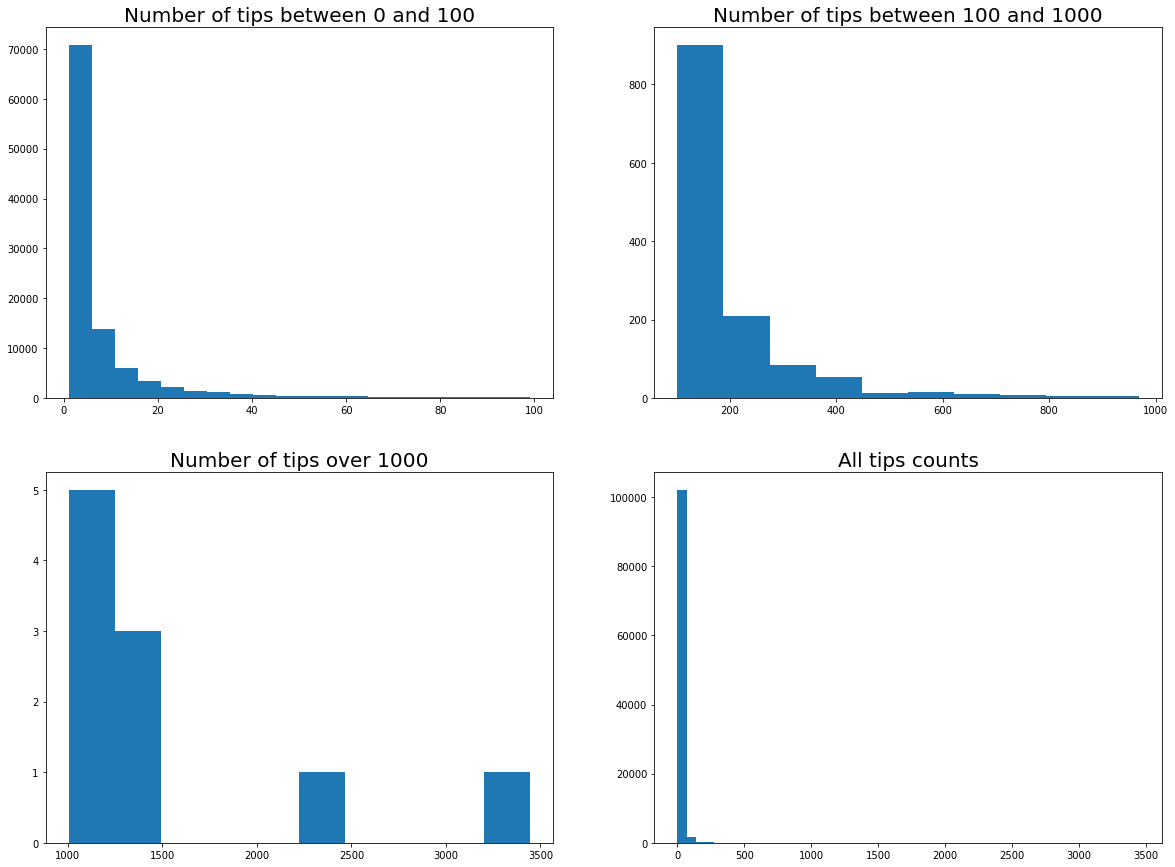

In [113]:
plt.figure(figsize=(20,15))

plt.subplot(221)
plt.hist(list(filter(lambda x: x < 100, tip_nums)), bins=20)
plt.title("Number of tips between 0 and 100", fontsize=20)
plt.subplot(222)
plt.hist(list(filter(lambda x: x > 100 and x < 1000, tip_nums)))
plt.title("Number of tips between 100 and 1000", fontsize=20)
plt.subplot(223)
plt.hist(list(filter(lambda x: x > 1000, tip_nums)))
plt.title("Number of tips over 1000", fontsize=20)
plt.subplot(224)
plt.hist(tip_nums, bins = 50)
plt.title("All tips counts", fontsize=20)
plt.show()

### Business Rating vs. Business Number of Reviews

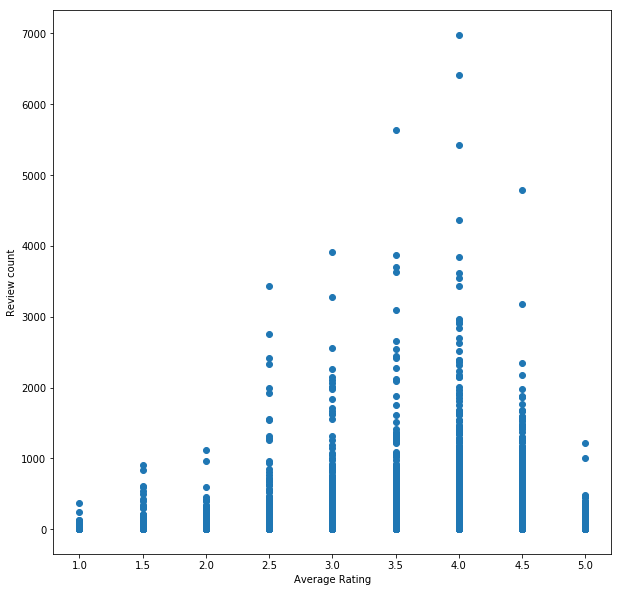

In [114]:
plt.figure(figsize=(10,10))
plt.scatter(temp_df.stars, temp_df.review_count)
plt.xlabel("Average Rating")
plt.ylabel("Review count")
plt.show()

### TODO: Evaluating distribution of review count by rating buckets

### Business Number of Tips vs. Business Number of Reviews

In [115]:
merged_dropped = merged.dropna()

Text(0,0.5,'Tip count')

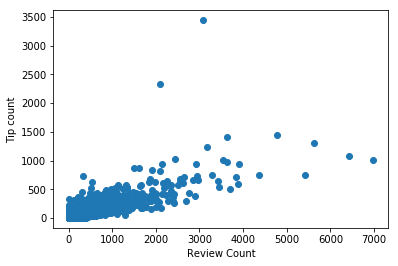

In [116]:
plt.scatter(merged_dropped.review_count, merged_dropped.tip_count)
plt.xlabel("Review Count")
plt.ylabel("Tip count")

#### Number of tips and Number of reviews is highly correlated

In [117]:
merged_dropped.review_count.corr(merged_dropped.tip_count)

0.83668047257953382

### Tip Count vs. Average Rating

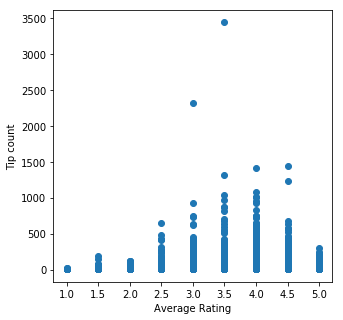

In [118]:
plt.figure(figsize=(5,5))
plt.scatter(merged_dropped.stars, merged_dropped.tip_count)
plt.xlabel("Average Rating")
plt.ylabel("Tip count")
plt.show()

### Create Business Photos Count

In [133]:
df_photos = pd.read_sql_query("select * from photo", conn)
df_photos.head()

,id,business_id,caption,label
0,--0uqWanwN31OkuuwJ1zjQ,XIg92ukZJn_1aiNx0OmusQ,Le Gadboi: Poutine with pogos and onion rings.,food
1,--3gCyYz0Eo3r07tAvUbhg,VeiL_tgw7dsl-7IcnOsh0g,Their OMAKASE is AMAZING!!!!! Very recommended,food
2,--3vR19cePIkGQBgcLsQkw,If6Bku2jkgPiikR6HBu-XQ,Big steak omelette,food
3,--7InqXrxwFUY6-ePZILpQ,QJatAcxYgK1Zp9BRZMAx7g,,food
4,--9fNU-8m06bbXM3jIha_w,ICdoTODBaprN0UReete9VQ,Chocolate Cake 08/12/17 @endoedibles on Instag...,food


In [134]:
bus_photos_list = list(df_photos.business_id)
del df_photos

In [135]:
print("Number of photos:", len(bus_photos_list))
print("Number of unique businesses in photos list:", len(set(bus_photos_list)))

Number of photos: 196278
Number of unique businesses in photos list: 27850


In [136]:
photos_count_dict = defaultdict(int)
for bus in bus_photos_list:
    photos_count_dict[bus] += 1

In [160]:
l = [(k, v) for (k, v) in photos_count_dict.items()]

df_photos_count = pd.DataFrame(l)
df_photos_count.columns = ["id", "photo_count"]
df_photos_count.head()

,id,photo_count
0,XIg92ukZJn_1aiNx0OmusQ,1
1,VeiL_tgw7dsl-7IcnOsh0g,24
2,If6Bku2jkgPiikR6HBu-XQ,6
3,QJatAcxYgK1Zp9BRZMAx7g,212
4,ICdoTODBaprN0UReete9VQ,58


In [161]:
merged = pd.merge(left=merged,right=df_photos_count, how='left', 
                       left_on='id', right_on='id')
merged.head()

,id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,tip_count,photo_count
0,--6MefnULPED_I942VcFNA,John's Chinese BBQ Restaurant,,"328 Highway 7 E, Chalmers Gate 11, Unit 10",Richmond Hill,ON,L4B 3P7,43.8409,-79.3996,3.0,30,1,12.0,1.0
1,--7zmmkVg-IMGaXbuVd0SQ,Primal Brewery,,16432 Old Statesville Rd,Huntersville,NC,28078,35.4371,-80.8437,4.0,42,1,10.0,NaN
2,--8LPVSo5i0Oo61X01sV9A,Valley Bone and Joint Specialists,,"3941 E Baseline Rd, Ste 102",Gilbert,AZ,85234,33.3795,-111.7280,4.5,3,1,NaN,NaN
3,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,The Strip,3355 Las Vegas Blvd S,Las Vegas,NV,89109,36.1232,-115.1690,4.0,1389,1,144.0,127.0
4,--9QQLMTbFzLJ_oT-ON3Xw,Great Clips,,"1835 E Guadalupe Rd, Ste 106",Tempe,AZ,85283,33.3617,-111.9100,3.0,9,1,2.0,NaN


### Business Number of Photos vs. Business Average Rating

In [163]:
# Take the subset that includes the businesses that have photos data
photos_dropped = merged.dropna(subset=['photo_count'], how='all')
photos_dropped.shape

(27850, 14)

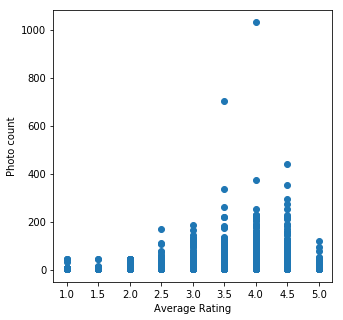

In [164]:
plt.figure(figsize=(5,5))
plt.scatter(photos_dropped.stars, photos_dropped.photo_count)
plt.xlabel("Average Rating")
plt.ylabel("Photo count")
plt.show()

In [166]:
merged.shape

(156639, 14)

## New table 'business2' that includes photo_count and tip_count

In [170]:
merged.to_sql('business2', conn, index = False)

### Business Number of Reviews vs. Business Total Checkins

In [171]:
df_checkins = pd.read_sql_query("select * from checkin_total", conn)

In [172]:
df_checkins.total_count.describe()

count    135148.000000
mean        117.028983
std         704.498857
min           1.000000
25%           5.000000
50%          18.000000
75%          67.000000
max      126689.000000
Name: total_count, dtype: float64

**WOW!**. That standard deviation is super high! There are a handfull of super popular restaurants

#### Let's merge into our super dataframe our df_checkins

In [175]:
merged = pd.merge(left=merged,right=df_checkins, how='left', 
                       left_on='id', right_on='business_id')
merged.head()

,id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,tip_count,photo_count,business_id,total_count
0,--6MefnULPED_I942VcFNA,John's Chinese BBQ Restaurant,,"328 Highway 7 E, Chalmers Gate 11, Unit 10",Richmond Hill,ON,L4B 3P7,43.8409,-79.3996,3.0,30,1,12.0,1.0,--6MefnULPED_I942VcFNA,122.0
1,--7zmmkVg-IMGaXbuVd0SQ,Primal Brewery,,16432 Old Statesville Rd,Huntersville,NC,28078,35.4371,-80.8437,4.0,42,1,10.0,NaN,--7zmmkVg-IMGaXbuVd0SQ,132.0
2,--8LPVSo5i0Oo61X01sV9A,Valley Bone and Joint Specialists,,"3941 E Baseline Rd, Ste 102",Gilbert,AZ,85234,33.3795,-111.7280,4.5,3,1,NaN,NaN,--8LPVSo5i0Oo61X01sV9A,1.0
3,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,The Strip,3355 Las Vegas Blvd S,Las Vegas,NV,89109,36.1232,-115.1690,4.0,1389,1,144.0,127.0,--9e1ONYQuAa-CB_Rrw7Tw,2469.0
4,--9QQLMTbFzLJ_oT-ON3Xw,Great Clips,,"1835 E Guadalupe Rd, Ste 106",Tempe,AZ,85283,33.3617,-111.9100,3.0,9,1,2.0,NaN,--9QQLMTbFzLJ_oT-ON3Xw,29.0


In [176]:
del merged['business_id']
merged = merged.rename(columns={'total_count' : 'checkin_count'})

In [177]:
merged.head()

,id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,tip_count,photo_count,checkin_count
0,--6MefnULPED_I942VcFNA,John's Chinese BBQ Restaurant,,"328 Highway 7 E, Chalmers Gate 11, Unit 10",Richmond Hill,ON,L4B 3P7,43.8409,-79.3996,3.0,30,1,12.0,1.0,122.0
1,--7zmmkVg-IMGaXbuVd0SQ,Primal Brewery,,16432 Old Statesville Rd,Huntersville,NC,28078,35.4371,-80.8437,4.0,42,1,10.0,NaN,132.0
2,--8LPVSo5i0Oo61X01sV9A,Valley Bone and Joint Specialists,,"3941 E Baseline Rd, Ste 102",Gilbert,AZ,85234,33.3795,-111.7280,4.5,3,1,NaN,NaN,1.0
3,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,The Strip,3355 Las Vegas Blvd S,Las Vegas,NV,89109,36.1232,-115.1690,4.0,1389,1,144.0,127.0,2469.0
4,--9QQLMTbFzLJ_oT-ON3Xw,Great Clips,,"1835 E Guadalupe Rd, Ste 106",Tempe,AZ,85283,33.3617,-111.9100,3.0,9,1,2.0,NaN,29.0


#### Let's graph `checkin_count` vs. `review_count`

In [178]:
checkin_graph_data = merged.dropna(subset=['checkin_count'])

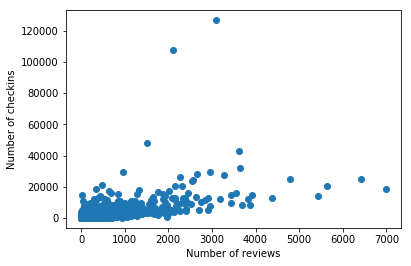

In [180]:
plt.scatter(checkin_graph_data.review_count, checkin_graph_data.checkin_count)
plt.xlabel("Number of reviews")
plt.ylabel("Number of checkins")
plt.show()

In [186]:
checkin_graph_data.review_count.corr(checkin_graph_data.checkin_count)

0.64486078887319387

### Number of checkins vs. Business Rating

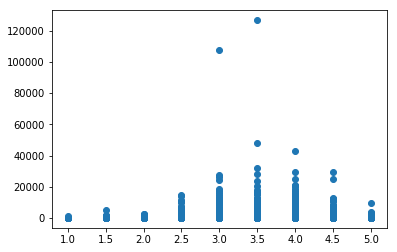

In [183]:
plt.scatter(checkin_graph_data.stars, checkin_graph_data.checkin_count)
plt.show()

In [ ]:
checkin_gr